# Linear Discriminant Analysis 


**Dataser:** https://www.kaggle.com/datasets/uciml/iris



About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species
----------------
--------------------

**Linear Discriminant Analysis (LDA) was proposed by R. Fischer in 1936. It consists in finding the projection hyperplan ethat 
minimizes the interclass variance and maximizes the distance between the projected means of the classes. Similarly to PCA, 
these two objectives can be solved by solving an eigenvalue problem with the corresponding eigenvector defining the 
hyperplane of interest.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ckeking Data
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Cheking if Species are equally Distributed or not
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
# Making list of all Species
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [5]:
# Converting Species into number to make prediction
y = iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [6]:
# Selecting Feature
X =iris.drop(['Species','Id'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler

# Standarized The Data
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
X= pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Condensing to two colums only using lda becaue we can't plot 4D Graph 
lda =LinearDiscriminantAnalysis(n_components=2)
X = lda.fit_transform(X,y)

In [10]:
X = pd.DataFrame(X,columns=['Col_1','Col_2'])
X.head()

,Col_1,Col_2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639


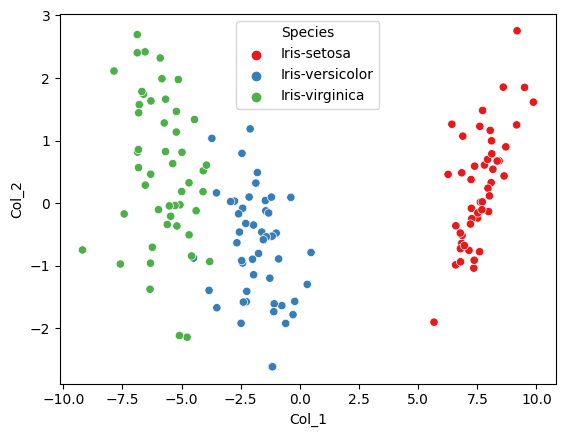

In [11]:
# Ploting data after lda to chek the saperation
sns.scatterplot(data=X,x='Col_1',y='Col_2',hue=iris['Species'],palette='Set1');

In [12]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [13]:
from sklearn.svm import SVC

# Selecting Support vector machine for classification (you can select any ml model)
model = SVC(C=10)
model.fit(X_train,y_train)

SVC(C=10)

In [14]:
# Making Ploting boundry function
def plot_svm_boundary(model,X,y,hue):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=hue, s=30,palette='Set1')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.predict(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-2,-1, 0, 1,2], alpha=0.5,
                       linestyles=['--', '-', '--','--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                       linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

-10.141175576827552 10.822248803887122 -2.885560384164421 3.0242122922491967


C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


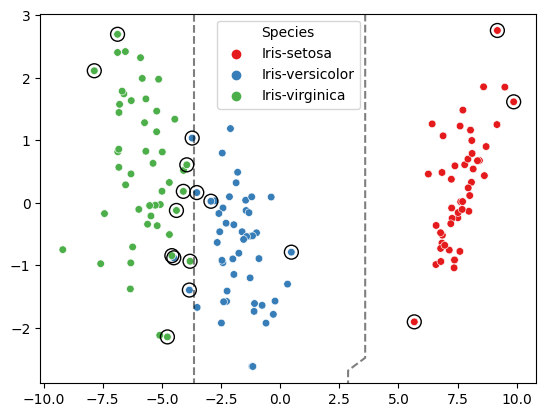

In [15]:
# Ploting boundry of separation using above function
plot_svm_boundary(model,X,y,hue=iris['Species'])

In [16]:
# Making prediction from SVc
y_preds = model.predict(X_test)

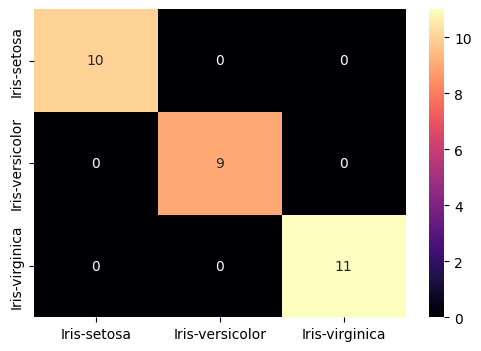

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

# Ploting confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap((pd.DataFrame(confusion_matrix(y_pred=y_preds,y_true=y_test),index=Species,columns=Species)),fmt='.2g',annot=True,cmap='magma');

In [18]:
# print classification report
print(classification_report(y_pred=y_preds,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# *The end*

--------------